# Peer-graded Assignment Capstone-Open an Italian Restaurant in NYC:

## A. Introduction & Business Problem and Describe the Data:

### A.1. Introduction / Business Problem: 

<font size ="3">
The City of New York, is the most populous city in the United States. It is diverse and is the financial capital of USA. It is multicultural with 19.45 million people. New York City welcomed a record of 65.2 million visitors, comprising 51.6 million domestic and 13.5 million international visitors in 2019, It provides lot of business opportunities  and business friendly environment. one of Largest cities by population in New York is Brooklyn, this city has a lot of immigrants from all over the world with many cultural diversity which allowing a huge types of cuisines one can offer in the restaurant business.

Demographics of Brooklyn:- 
    
| Ancestry  |  Number  | % of total population  |
|:--------:|:--------:|:----------------------:|
| Italian  | 157,068  | 6.1%                   |
| Irish    | 100,923  | 3.9%                   |
| Russian  | 88,766   | 3.5%                   |
| Polish   | 71,099   | 2.8%                   |
| German   | 53,188   | 2.1%                   |
| English  | 36,174   | 1.4%                   |
    

As it is highly developed city so cost of doing business is also one of the highest. Thus, any new business venture or expansion needs to be analyzed carefully. The insights derived from analysis will give good understanding of the business environment which help in strategically targeting the market. This will help in reduction of risk and the return on investment will be reasonable. 

Our analysis will be covered the following factors:
* The best location to start the business.
* The types of our target Customers.
* defined our Potential competitors?
</font>



### A.2. Import required Libraries:

<font size = '3'>To Identify the best location to start the business in Brooklyn, I need to find out the number of our competitors in each neighborhoods in Brooklyn .

I used NYC OpenData to import the data of "Neighborhoods in New York City
    
https://data.cityofnewyork.us/City-Government/Neighborhood-Tabulation-Areas-NTA-/cpf4-rkhq

In Brooklyn, there is 576 Italian restaurants are currently running. 

I used Forsquare API to get the most common venues of given Borough of Brooklyn and the Italian restuarants Id.
    
https://foursquare.com/ 
    
 I used Google API to find their geographic coordinates based on their postal code addresses.

</font>


## B. Methodology:

### B.1. Import required Libraries:

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
from pprint import pprint # data pretty printer

import requests # library to handle requests
from bs4 import BeautifulSoup  # library to handle web scraping

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # map rendering library

import matplotlib.cm as cm # Matplotlib and associated plotting modules
import matplotlib.colors as colors # Matplotlib and associated plotting modules

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from collections import Counter # count occurrences 

from sklearn.cluster import KMeans # import k-means from clustering stage

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('All required Libraries imported')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

All required Libraries imported


### B.2. Read and Explore New York City Dataset:

### - Read The Data:

In [2]:
# Read Data 
df = pd.read_csv("NYC_Data.csv")
df.head()

,Latitude,Longitude,OBJECTID,Name,Stacked,AnnoLine1,AnnoLine2,AnnoLine3,AnnoAngle,Borough
0,40.894705,-73.847201,1,Wakefield,1,Wakefield,NaN,NaN,0,Bronx
1,40.874294,-73.829939,2,Co-op; City,2,Co-op,City,NaN,0,Bronx
2,40.887556,-73.827806,3,Eastchester,1,Eastchester,NaN,NaN,0,Bronx
3,40.895437,-73.905643,4,Fieldston,1,Fieldston,NaN,NaN,0,Bronx
4,40.890834,-73.912585,5,Riverdale,1,Riverdale,NaN,NaN,0,Bronx


### - Clean The Data:

In [3]:
# drop unnecessary Columns 
NYC_df = df.drop(columns = ['OBJECTID', 'Stacked', 'AnnoLine1', 'AnnoLine2', 'AnnoLine3', 'AnnoAngle'])
NYC_df = df[['Borough', 'Name', 'Latitude', 'Longitude']]
NYC_df.head()

,Borough,Name,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op; City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [4]:
# Rename 'Name' column to 'Neighborhood'
NYC_df = NYC_df.rename(columns={'Name': 'Neighborhood'})
NYC_df.reset_index(drop=True, inplace=True) # reset index 
NYC_df.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op; City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [5]:
# returen the numbers of columns and rows 
NYC_df.shape

(299, 4)

### B.3. Create a map of New York with neighborhoods.

In [6]:
address = 'New York City, NY'
location = None

# define an instance of the geocoder -> ny_explorer
while location == None:
    try:
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
    except:
        pass
print("latitude: ", latitude, " & longitude:" ,longitude)

latitude:  40.7127281  & longitude: -74.0060152


In [7]:
# Create Brooklenn dataframe
brooklyn_data = NYC_df[NYC_df['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay; Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset; Park,40.645103,-74.010316
3,Brooklyn,Green,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


In [8]:
# create map of Brooklyn, New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(brooklyn_data['Latitude'], brooklyn_data['Longitude'], brooklyn_data['Borough'], brooklyn_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#d6add5',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

### B.4. Define Foursquare Credentials and Version:

In [9]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'ON5YVHHLDSVO0R0FEBOTOR3VZRAC1WXSOGL4CVP5C0DGLCUZ' 
CLIENT_SECRET = '5BDHPM1UXLUJSG2C1AFGSTAB55CUTXGIWDTL1330QCBXDNCJ' 
VERSION = '20200726'
LIMIT = 5000
radius = 5000 
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ON5YVHHLDSVO0R0FEBOTOR3VZRAC1WXSOGL4CVP5C0DGLCUZ
CLIENT_SECRET:5BDHPM1UXLUJSG2C1AFGSTAB55CUTXGIWDTL1330QCBXDNCJ


### Let's  relevant information for each nearby venue:

In [10]:
import urllib
def getNearbyVenues(names, latitudes, longitudes, radius=5000, categoryIds=''):
    try:
        venues_list=[]
        for name, lat, lng in zip(names, latitudes, longitudes):
            #print(name)

            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)

            if (categoryIds != ''):
                url = url + '&categoryId={}'
                url = url.format(categoryIds)

            # make the GET request
            response = requests.get(url).json()
            results = response["response"]['venues']

            # return only relevant information for each nearby venue
            for v in results:
                success = False
                try:
                    category = v['categories'][0]['name']
                    success = True
                except:
                    pass

                if success:
                    venues_list.append([(
                        name, 
                        lat, 
                        lng, 
                        v['name'], 
                        v['location']['lat'], 
                        v['location']['lng'],
                        v['categories'][0]['name']
                    )])

        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',  
                  'Venue Category']
    
    except:
        print(url)
        print(response)
        print(results)
        print(nearby_venues)

    return(nearby_venues)

In [11]:
# run the function on each neighborhood and create a new dataframe
brooklyn_venues = getNearbyVenues(names = brooklyn_data['Neighborhood'],
                                 latitudes = brooklyn_data['Latitude'],
                                 longitudes = brooklyn_data['Longitude']
                                 )

In [12]:
# filter data of Venue Category 
Brooklyn_food_venues = brooklyn_venues[brooklyn_venues['Venue Category'].str.contains(r'Food(?!$)', r'Restaurant(?!$)')]
Brooklyn_food_venues.reset_index(drop=True, inplace=True)
Brooklyn_food_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bensonhurst,40.611009,-73.995180,Mcdonaldz,40.611018,-73.993416,Fast Food Restaurant
1,Sunset; Park,40.645103,-74.010316,McDonald's,40.644005,-74.011246,Fast Food Restaurant
2,Sunset; Park,40.645103,-74.010316,Burger King,40.643803,-74.011881,Fast Food Restaurant
3,Sunset; Park,40.645103,-74.010316,Street Meat,40.645015,-74.011024,Food Truck
4,Sunset; Park,40.645103,-74.010316,Esquites Man,40.644046,-74.011495,Food Truck


In [13]:
Brooklyn_food_venues.shape

(108, 7)

In [14]:
# Let's check how many venues were returned for each neighborhood
Brooklyn_food_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bath; Beach,1,1,1,1,1,1
Bedford; Stuyvesant,3,3,3,3,3,3
Bensonhurst,1,1,1,1,1,1
Bergen; Beach,2,2,2,2,2,2
Brighton; Beach,2,2,2,2,2,2
Broadway; Junction,2,2,2,2,2,2
Brownsville,1,1,1,1,1,1
Bushwick,1,1,1,1,1,1
Carroll; Gardens,1,1,1,1,1,1


In [15]:
# let's chech the uniques categories in neighborhood
print('There are {} uniques categories.'.format(len(Brooklyn_food_venues['Venue Category'].unique())))
Brooklyn_food_venues.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False)

There are 9 uniques categories.


Venue Category
Food Truck                         42
Fast Food Restaurant               28
Food & Drink Shop                  14
Food Court                          8
Food Stand                          7
Southern / Soul Food Restaurant     4
Health Food Store                   2
Food Service                        2
Comfort Food Restaurant             1
Name: Venue Category, dtype: int64

In [16]:
# one hot encoding
brooklyn_onehot = pd.get_dummies(Brooklyn_food_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
brooklyn_onehot['Neighborhood'] = Brooklyn_food_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [brooklyn_onehot.columns[-1]] + list(brooklyn_onehot.columns[:-1])
brooklyn_onehot = brooklyn_onehot[fixed_columns]

brooklyn_onehot.head()

,Neighborhood,Comfort Food Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Health Food Store,Southern / Soul Food Restaurant
0,Bensonhurst,0,1,0,0,0,0,0,0,0
1,Sunset; Park,0,1,0,0,0,0,0,0,0
2,Sunset; Park,0,1,0,0,0,0,0,0,0
3,Sunset; Park,0,0,0,0,0,0,1,0,0
4,Sunset; Park,0,0,0,0,0,0,1,0,0


In [17]:
venue_counts = brooklyn_onehot.groupby('Neighborhood').sum()
venue_counts.head(5)

,Comfort Food Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Health Food Store,Southern / Soul Food Restaurant
Neighborhood,,,,,,,,,
Bath; Beach,0,1,0,0,0,0,0,0,0
Bedford; Stuyvesant,0,0,2,0,0,0,1,0,0
Bensonhurst,0,1,0,0,0,0,0,0,0
Bergen; Beach,1,1,0,0,0,0,0,0,0
Brighton; Beach,0,0,2,0,0,0,0,0,0


In [18]:
#Let's find out the top 10 food categories in Brooklyn
venue_counts_described = brooklyn_onehot.describe().transpose()
venue_top10 = venue_counts_described.sort_values('max', ascending=False)[0:10]
venue_top10

,count,mean,std,min,25%,50%,75%,max
Comfort Food Restaurant,108.0,0.009259,0.096225,0.0,0.0,0.0,0.0,1.0
Fast Food Restaurant,108.0,0.259259,0.440271,0.0,0.0,0.0,1.0,1.0
Food & Drink Shop,108.0,0.129630,0.337461,0.0,0.0,0.0,0.0,1.0
Food Court,108.0,0.074074,0.263112,0.0,0.0,0.0,0.0,1.0
Food Service,108.0,0.018519,0.135445,0.0,0.0,0.0,0.0,1.0
Food Stand,108.0,0.064815,0.247347,0.0,0.0,0.0,0.0,1.0
Food Truck,108.0,0.388889,0.489771,0.0,0.0,0.0,1.0,1.0
Health Food Store,108.0,0.018519,0.135445,0.0,0.0,0.0,0.0,1.0
Southern / Soul Food Restaurant,108.0,0.037037,0.189733,0.0,0.0,0.0,0.0,1.0


In [19]:
venue_top10_list = venue_top10.index.values.tolist()

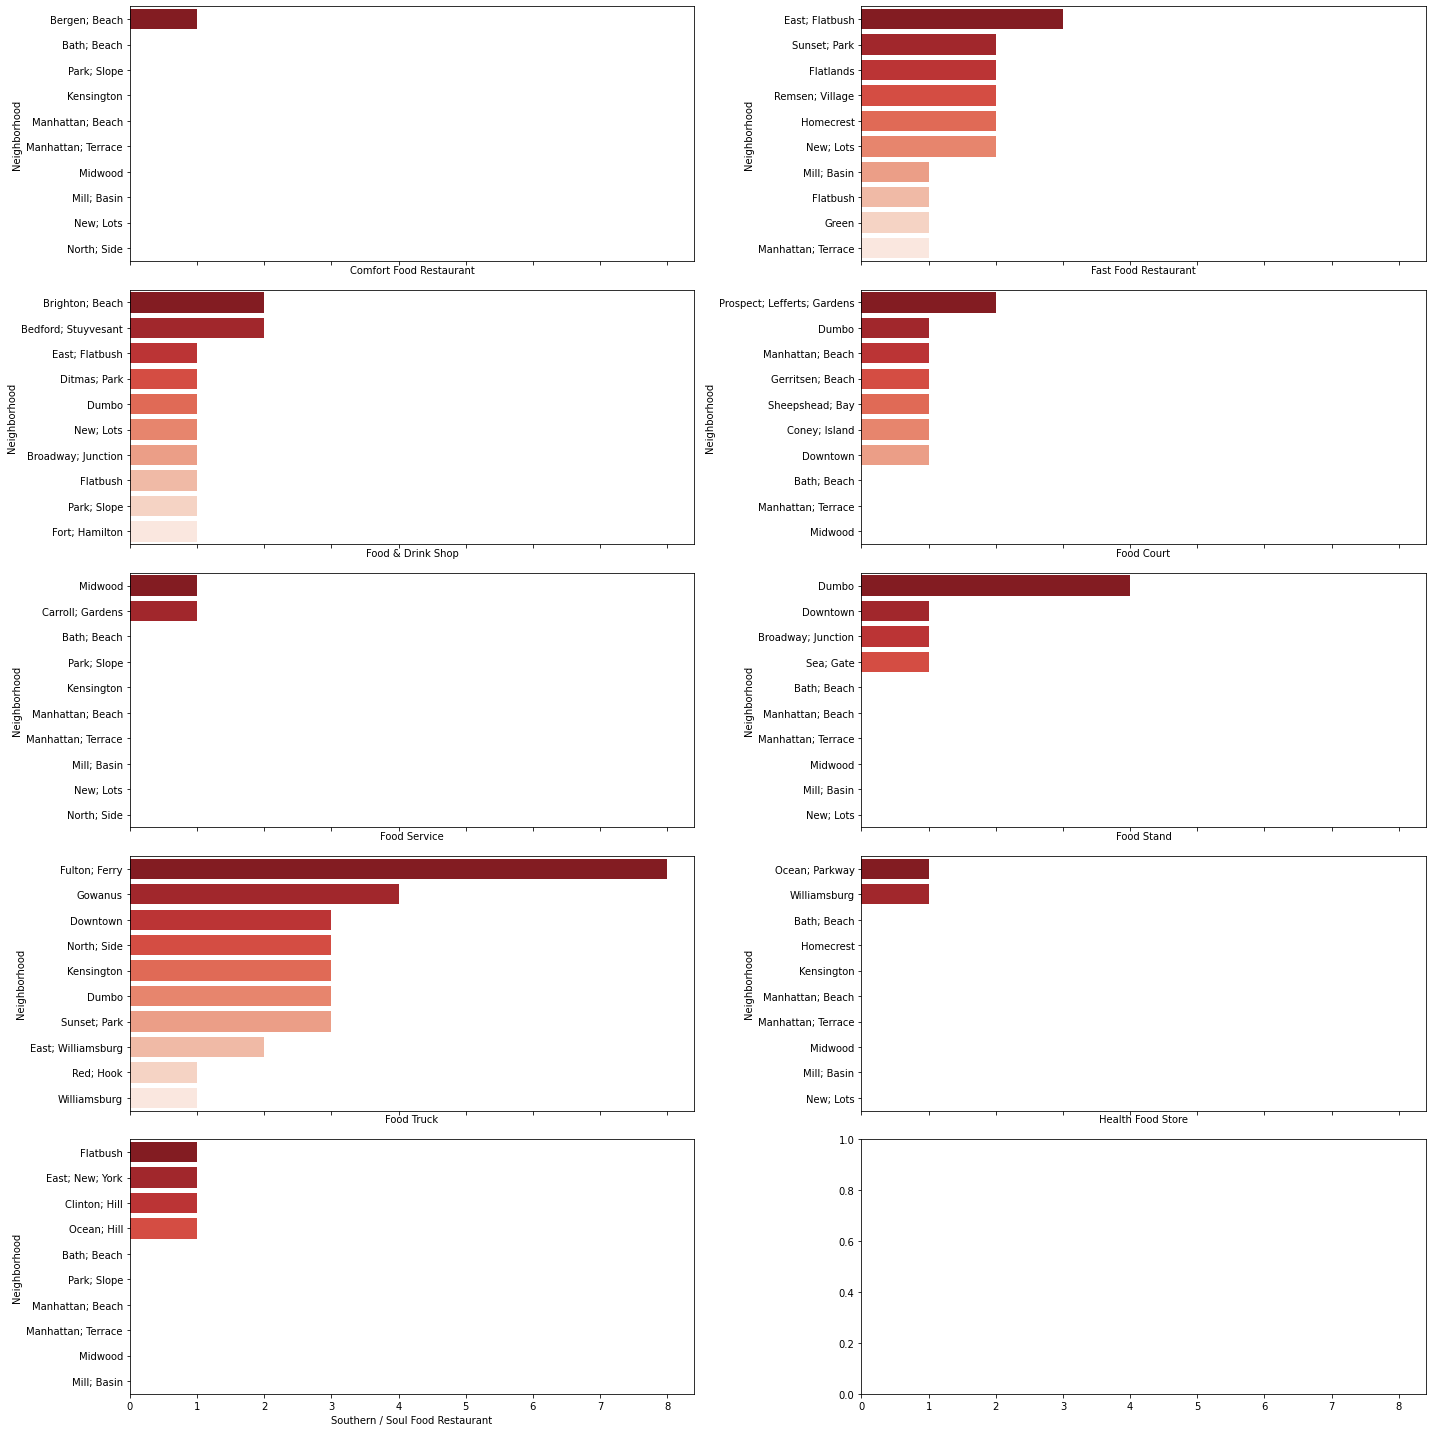

In [20]:
# plot the top 10 food categories in the Neighborhood 
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes =plt.subplots(5, 2, figsize=(20,20), sharex=True)
axes = axes.flatten()

for ax, category in zip(axes, venue_top10_list):
    data = venue_counts[[category]].sort_values([category], ascending=False)[0:10]
    pal = sns.color_palette("Reds", len(data))
    sns.barplot(x=category, y=data.index, data=data, ax=ax, palette=np.array(pal[::-1]))

plt.tight_layout()
plt.show();

In [21]:
# Let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
brooklyn_grouped = brooklyn_onehot.groupby('Neighborhood').mean().reset_index()
brooklyn_grouped.head()

,Neighborhood,Comfort Food Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Health Food Store,Southern / Soul Food Restaurant
0,Bath; Beach,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,Bedford; Stuyvesant,0.0,0.0,0.666667,0.0,0.0,0.0,0.333333,0.0,0.0
2,Bensonhurst,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,Bergen; Beach,0.5,0.5,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,Brighton; Beach,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0


In [22]:
brooklyn_grouped.shape

(48, 10)

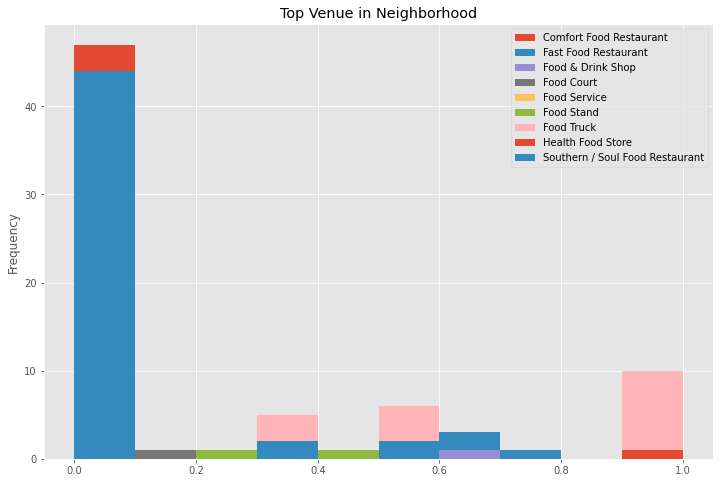

In [23]:
# import matplotlib and matplotlib.pylot
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

brooklyn_grouped.plot(kind='hist', figsize=(12, 8))
plt.title('Top Venue in Neighborhood') # add a title to the histogram
plt.show()

In [24]:
# Let's print each neighborhood along with the top 5 most common venues
num_top_venues = 10

for hood in brooklyn_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = brooklyn_grouped[brooklyn_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bath; Beach----
                             venue  freq
0             Fast Food Restaurant   1.0
1          Comfort Food Restaurant   0.0
2                Food & Drink Shop   0.0
3                       Food Court   0.0
4                     Food Service   0.0
5                       Food Stand   0.0
6                       Food Truck   0.0
7                Health Food Store   0.0
8  Southern / Soul Food Restaurant   0.0


----Bedford; Stuyvesant----
                             venue  freq
0                Food & Drink Shop  0.67
1                       Food Truck  0.33
2          Comfort Food Restaurant  0.00
3             Fast Food Restaurant  0.00
4                       Food Court  0.00
5                     Food Service  0.00
6                       Food Stand  0.00
7                Health Food Store  0.00
8  Southern / Soul Food Restaurant  0.00


----Bensonhurst----
                             venue  freq
0             Fast Food Restaurant   1.0
1          Comfort Food Re

In [25]:
# Let's put that information into a pandas dataframe

# Function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
# create the new dataframe and display the top 5 venues for each neighborhood
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = brooklyn_grouped['Neighborhood']

for ind in np.arange(brooklyn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brooklyn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bath; Beach,Fast Food Restaurant,Southern / Soul Food Restaurant,Health Food Store,Food Truck,Food Stand
1,Bedford; Stuyvesant,Food & Drink Shop,Food Truck,Southern / Soul Food Restaurant,Health Food Store,Food Stand
2,Bensonhurst,Fast Food Restaurant,Southern / Soul Food Restaurant,Health Food Store,Food Truck,Food Stand
3,Bergen; Beach,Fast Food Restaurant,Comfort Food Restaurant,Southern / Soul Food Restaurant,Health Food Store,Food Truck
4,Brighton; Beach,Food & Drink Shop,Southern / Soul Food Restaurant,Health Food Store,Food Truck,Food Stand


In [27]:
# get Italian Restaurant id https://developer.foursquare.com/docs/resources/categories 
#Italian Restaurant = 4bf58dd8d48988d110941735
NYC_df = NYC_df[NYC_df['Borough'] == 'Brooklyn'].reset_index(drop=True)
newyork_venues_italian = getNearbyVenues(names=NYC_df['Neighborhood'], latitudes=NYC_df['Latitude'], longitudes=NYC_df['Longitude'], radius=1000, categoryIds='4bf58dd8d48988d110941735')
newyork_venues_italian.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay; Ridge,40.625801,-74.030621,Zio Toto,40.624791,-74.030551,Italian Restaurant
1,Bay; Ridge,40.625801,-74.030621,Sofia's,40.624862,-74.030405,Italian Restaurant
2,Bay; Ridge,40.625801,-74.030621,Sofia Restorante Italiano,40.624847,-74.030522,Italian Restaurant
3,Bay; Ridge,40.625801,-74.030621,Paneantico,40.619368,-74.032814,Bakery
4,Bay; Ridge,40.625801,-74.030621,Ponte Vecchio Restaurant,40.621227,-74.029143,Italian Restaurant


In [28]:
newyork_venues_italian.shape

(577, 7)

In [29]:
def addToMap(df, color, existingMap):
    for lat, lng, local, venue, venueCat in zip(df['Venue Latitude'], df['Venue Longitude'], df['Neighborhood'], df['Venue'], df['Venue Category']):
        label = '{} ({}) - {}'.format(venue, venueCat, local)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='Blue',
            fill=True,
            fill_color='#d6add5',
            fill_opacity=0.7).add_to(existingMap)

In [30]:
map_newyork_italian = folium.Map(location=[latitude, longitude], zoom_start=9)
addToMap(newyork_venues_italian, 'blue', map_newyork_italian)

map_newyork_italian

### C. Analyzing each neighborhood

In [31]:
# one hot encoding
brooklyn_onehot = pd.get_dummies(newyork_venues_italian[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
brooklyn_onehot['Neighborhood'] = newyork_venues_italian['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [brooklyn_onehot.columns[-1]] + list(brooklyn_onehot.columns[:-1])
brooklyn_onehot = brooklyn_onehot[fixed_columns]

brooklyn_onehot.head()

,Neighborhood,American Restaurant,Bakery,Café,Caribbean Restaurant,Event Space,Food & Drink Shop,Food Truck,French Restaurant,Ice Cream Shop,Italian Restaurant,Latin American Restaurant,New American Restaurant,Pizza Place,Sandwich Place,Seafood Restaurant,Wine Bar
0,Bay; Ridge,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,Bay; Ridge,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Bay; Ridge,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Bay; Ridge,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bay; Ridge,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [32]:
# Checking the size of the DataFrame
brooklyn_onehot.shape

(577, 17)

In [33]:
# Let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
brooklyn_grouped = brooklyn_onehot.groupby('Neighborhood').mean().reset_index()
brooklyn_grouped

,Neighborhood,American Restaurant,Bakery,Café,Caribbean Restaurant,Event Space,Food & Drink Shop,Food Truck,French Restaurant,Ice Cream Shop,Italian Restaurant,Latin American Restaurant,New American Restaurant,Pizza Place,Sandwich Place,Seafood Restaurant,Wine Bar
0,Bath; Beach,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Bay; Ridge,0.052632,0.052632,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.736842,0.000000,0.000000,0.105263,0.000000,0.052632,0.000000
2,Bedford; Stuyvesant,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
3,Bensonhurst,0.076923,0.076923,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.769231,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000
4,Bergen; Beach,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
5,Boerum; Hill,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.031250,0.031250,0.000000,0.656250,0.000000,0.000000,0.250000,0.031250,0.000000,0.000000
6,Borough; Park,0.000000,0.000000,0.000000,0.0,0.5,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Brighton; Beach,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Brooklyn; Heights,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.043478,0.000000,0.000000,0.652174,0.000000,0.000000,0.260870,0.043478,0.000000,0.000000
9,Bushwick,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000


In [34]:
# Confirm the new size
brooklyn_grouped.shape

(63, 17)

In [35]:
# Let's print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in brooklyn_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = brooklyn_grouped[brooklyn_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bath; Beach----
                  venue  freq
0    Italian Restaurant   1.0
1   American Restaurant   0.0
2                Bakery   0.0
3                  Café   0.0
4  Caribbean Restaurant   0.0


----Bay; Ridge----
                 venue  freq
0   Italian Restaurant  0.74
1          Pizza Place  0.11
2  American Restaurant  0.05
3               Bakery  0.05
4   Seafood Restaurant  0.05


----Bedford; Stuyvesant----
                 venue  freq
0   Italian Restaurant   0.5
1          Pizza Place   0.5
2  American Restaurant   0.0
3               Bakery   0.0
4                 Café   0.0


----Bensonhurst----
                 venue  freq
0   Italian Restaurant  0.77
1  American Restaurant  0.08
2               Bakery  0.08
3          Pizza Place  0.08
4                 Café  0.00


----Bergen; Beach----
                 venue  freq
0   Italian Restaurant   0.5
1          Pizza Place   0.5
2  American Restaurant   0.0
3               Bakery   0.0
4                 Café   0.0


----B

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
# create the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = brooklyn_grouped['Neighborhood']

for ind in np.arange(brooklyn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brooklyn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bath; Beach,Italian Restaurant,Wine Bar,Seafood Restaurant,Sandwich Place,Pizza Place,New American Restaurant,Latin American Restaurant,Ice Cream Shop,French Restaurant,Food Truck
1,Bay; Ridge,Italian Restaurant,Pizza Place,Seafood Restaurant,Bakery,American Restaurant,Wine Bar,Sandwich Place,New American Restaurant,Latin American Restaurant,Ice Cream Shop
2,Bedford; Stuyvesant,Pizza Place,Italian Restaurant,Wine Bar,Seafood Restaurant,Sandwich Place,New American Restaurant,Latin American Restaurant,Ice Cream Shop,French Restaurant,Food Truck
3,Bensonhurst,Italian Restaurant,Pizza Place,Bakery,American Restaurant,Wine Bar,Seafood Restaurant,Sandwich Place,New American Restaurant,Latin American Restaurant,Ice Cream Shop
4,Bergen; Beach,Pizza Place,Italian Restaurant,Wine Bar,Seafood Restaurant,Sandwich Place,New American Restaurant,Latin American Restaurant,Ice Cream Shop,French Restaurant,Food Truck


### D. Cluster Neighborhoods

### Run k-means to count Neighborhoods for each cluster label for variable cluster size

In [38]:
brooklyn_grouped_clustering = brooklyn_grouped.drop('Neighborhood', 1)

In [68]:
from sklearn.metrics import silhouette_score

sil = []
K_sil = range(2,20)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(brooklyn_grouped_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(brooklyn_grouped_clustering, labels, metric = 'euclidean'))

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

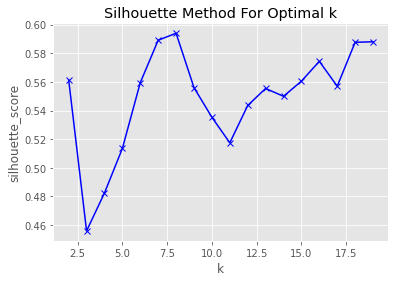

In [69]:
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

There is a peak at k = 2, k = 4 and k = 8. Two and four clusters will give a very broad classification of the venues.

In [107]:
# set number of clusters
kclusters = 8

# run k-means clustering
kmeans = KMeans(init="k-means++", n_clusters=kclusters,  random_state=0).fit(brooklyn_grouped_clustering)

print(Counter(kmeans.labels_))

Counter({4: 23, 1: 22, 0: 10, 5: 3, 2: 2, 6: 1, 3: 1, 7: 1})


In [108]:
# add clustering labels
try:
    neighborhoods_venues_sorted.drop('Cluster Labels', axis=1)
except:
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [109]:
neighborhoods_venues_sorted.shape

(63, 12)

In [110]:
neighborhoods_venues_sorted.head(5)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,Bath; Beach,Italian Restaurant,Wine Bar,Seafood Restaurant,Sandwich Place,Pizza Place,New American Restaurant,Latin American Restaurant,Ice Cream Shop,French Restaurant,Food Truck
1,1,Bay; Ridge,Italian Restaurant,Pizza Place,Seafood Restaurant,Bakery,American Restaurant,Wine Bar,Sandwich Place,New American Restaurant,Latin American Restaurant,Ice Cream Shop
2,5,Bedford; Stuyvesant,Pizza Place,Italian Restaurant,Wine Bar,Seafood Restaurant,Sandwich Place,New American Restaurant,Latin American Restaurant,Ice Cream Shop,French Restaurant,Food Truck
3,1,Bensonhurst,Italian Restaurant,Pizza Place,Bakery,American Restaurant,Wine Bar,Seafood Restaurant,Sandwich Place,New American Restaurant,Latin American Restaurant,Ice Cream Shop
4,5,Bergen; Beach,Pizza Place,Italian Restaurant,Wine Bar,Seafood Restaurant,Sandwich Place,New American Restaurant,Latin American Restaurant,Ice Cream Shop,French Restaurant,Food Truck


In [111]:
# merge neighborhoods_venues_sorted with nyc_data to add latitude/longitude for each neighborhood
brooklyn_merged = neighborhoods_venues_sorted.join(NYC_df.set_index('Neighborhood'), on='Neighborhood')
brooklyn_merged.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Borough,Latitude,Longitude
0,3,Bath; Beach,Italian Restaurant,Wine Bar,Seafood Restaurant,Sandwich Place,Pizza Place,New American Restaurant,Latin American Restaurant,Ice Cream Shop,French Restaurant,Food Truck,Brooklyn,40.599519,-73.998752
1,1,Bay; Ridge,Italian Restaurant,Pizza Place,Seafood Restaurant,Bakery,American Restaurant,Wine Bar,Sandwich Place,New American Restaurant,Latin American Restaurant,Ice Cream Shop,Brooklyn,40.625801,-74.030621
2,5,Bedford; Stuyvesant,Pizza Place,Italian Restaurant,Wine Bar,Seafood Restaurant,Sandwich Place,New American Restaurant,Latin American Restaurant,Ice Cream Shop,French Restaurant,Food Truck,Brooklyn,40.687232,-73.941785
3,1,Bensonhurst,Italian Restaurant,Pizza Place,Bakery,American Restaurant,Wine Bar,Seafood Restaurant,Sandwich Place,New American Restaurant,Latin American Restaurant,Ice Cream Shop,Brooklyn,40.611009,-73.995180
4,5,Bergen; Beach,Pizza Place,Italian Restaurant,Wine Bar,Seafood Restaurant,Sandwich Place,New American Restaurant,Latin American Restaurant,Ice Cream Shop,French Restaurant,Food Truck,Brooklyn,40.615150,-73.898556


In [112]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(brooklyn_merged['Latitude'], brooklyn_merged['Longitude'], brooklyn_merged['Neighborhood'], brooklyn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### D.1. Analyze clusters - Results:

In [47]:
required_column_indices = [2,3,7]
required_column = [list(brooklyn_merged.columns.values)[i] for i in required_column_indices]
required_column_indices = [2,3,7]

#### D.1.1. Cluster 1, Label = 0

In [48]:
cluster_0 = brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 0, brooklyn_merged.columns[1:12]]
cluster_0.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,Kensington,Food & Drink Shop,Wine Bar,Seafood Restaurant,Sandwich Place,Pizza Place,New American Restaurant,Latin American Restaurant,Italian Restaurant,Ice Cream Shop,French Restaurant


In [49]:
for col in required_column:
    print(cluster_0[col].value_counts(ascending = False))
    print("---------------------------------------------")

Food & Drink Shop    1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Wine Bar    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
New American Restaurant    1
Name: 6th Most Common Venue, dtype: int64
---------------------------------------------


#### D.1.2.  Cluster 1, Label = 1

In [50]:
cluster_1 = brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 1, brooklyn_merged.columns[1:12]]
cluster_1.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bay; Ridge,Italian Restaurant,Pizza Place,Seafood Restaurant,Bakery,American Restaurant,Wine Bar,Sandwich Place,New American Restaurant,Latin American Restaurant,Ice Cream Shop
3,Bensonhurst,Italian Restaurant,Pizza Place,Bakery,American Restaurant,Wine Bar,Seafood Restaurant,Sandwich Place,New American Restaurant,Latin American Restaurant,Ice Cream Shop
5,Boerum; Hill,Italian Restaurant,Pizza Place,Sandwich Place,French Restaurant,Food Truck,Wine Bar,Seafood Restaurant,New American Restaurant,Latin American Restaurant,Ice Cream Shop
8,Brooklyn; Heights,Italian Restaurant,Pizza Place,Sandwich Place,Food Truck,Wine Bar,Seafood Restaurant,New American Restaurant,Latin American Restaurant,Ice Cream Shop,French Restaurant
9,Bushwick,Italian Restaurant,Pizza Place,Wine Bar,Seafood Restaurant,Sandwich Place,New American Restaurant,Latin American Restaurant,Ice Cream Shop,French Restaurant,Food Truck


In [51]:
for col in required_column:
    print(cluster_1[col].value_counts(ascending = False))
    print("---------------------------------------------")

Italian Restaurant    23
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Pizza Place           22
Seafood Restaurant     1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
New American Restaurant    13
Seafood Restaurant          6
Wine Bar                    2
Sandwich Place              2
Name: 6th Most Common Venue, dtype: int64
---------------------------------------------


#### D.1.3.  Cluster 2, Label = 2

In [52]:
cluster_2 = brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 2, brooklyn_merged.columns[1:12]]
cluster_2.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Cypress; Hills,Pizza Place,Wine Bar,Seafood Restaurant,Sandwich Place,New American Restaurant,Latin American Restaurant,Italian Restaurant,Ice Cream Shop,French Restaurant,Food Truck
32,Highland; Park,Pizza Place,Wine Bar,Seafood Restaurant,Sandwich Place,New American Restaurant,Latin American Restaurant,Italian Restaurant,Ice Cream Shop,French Restaurant,Food Truck
39,Midwood,Pizza Place,Wine Bar,Seafood Restaurant,Sandwich Place,New American Restaurant,Latin American Restaurant,Italian Restaurant,Ice Cream Shop,French Restaurant,Food Truck


In [53]:
for col in required_column:
    print(cluster_2[col].value_counts(ascending = False))
    print("---------------------------------------------")

Pizza Place    3
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Wine Bar    3
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Latin American Restaurant    3
Name: 6th Most Common Venue, dtype: int64
---------------------------------------------


#### D.1.4. Cluster 3, Label = 3

In [54]:
cluster_3 = brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 3, brooklyn_merged.columns[1:12]]
cluster_3.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bath; Beach,Italian Restaurant,Wine Bar,Seafood Restaurant,Sandwich Place,Pizza Place,New American Restaurant,Latin American Restaurant,Ice Cream Shop,French Restaurant,Food Truck
7,Brighton; Beach,Italian Restaurant,Wine Bar,Seafood Restaurant,Sandwich Place,Pizza Place,New American Restaurant,Latin American Restaurant,Ice Cream Shop,French Restaurant,Food Truck
10,Carroll; Gardens,Italian Restaurant,Pizza Place,French Restaurant,Wine Bar,Seafood Restaurant,Sandwich Place,New American Restaurant,Latin American Restaurant,Ice Cream Shop,Food Truck
14,Coney; Island,Italian Restaurant,Wine Bar,Seafood Restaurant,Sandwich Place,Pizza Place,New American Restaurant,Latin American Restaurant,Ice Cream Shop,French Restaurant,Food Truck
25,Fort; Hamilton,Italian Restaurant,Sandwich Place,Bakery,Wine Bar,Seafood Restaurant,Pizza Place,New American Restaurant,Latin American Restaurant,Ice Cream Shop,French Restaurant


In [55]:
for col in required_column:
    print(cluster_3[col].value_counts(ascending = False))
    print("---------------------------------------------")

Italian Restaurant    22
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Wine Bar              17
Pizza Place            3
Seafood Restaurant     1
Sandwich Place         1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
New American Restaurant    20
Sandwich Place              1
Pizza Place                 1
Name: 6th Most Common Venue, dtype: int64
---------------------------------------------


#### D.1.5.  Cluster 4, Label = 4

In [56]:
cluster_4 = brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 4, brooklyn_merged.columns[1:12]]
cluster_4.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,City; Line,Pizza Place,Food Truck,Wine Bar,Seafood Restaurant,Sandwich Place,New American Restaurant,Latin American Restaurant,Italian Restaurant,Ice Cream Shop,French Restaurant
21,East; New; York,Pizza Place,Food Truck,Wine Bar,Seafood Restaurant,Sandwich Place,New American Restaurant,Latin American Restaurant,Italian Restaurant,Ice Cream Shop,French Restaurant


In [57]:
for col in required_column:
    print(cluster_4[col].value_counts(ascending = False))
    print("---------------------------------------------")

Pizza Place    2
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Food Truck    2
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
New American Restaurant    2
Name: 6th Most Common Venue, dtype: int64
---------------------------------------------


#### D.1.6.  Cluster 5, Label = 5:

In [58]:
cluster_5 = brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 5, brooklyn_merged.columns[1:12]]
cluster_5.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Bedford; Stuyvesant,Pizza Place,Italian Restaurant,Wine Bar,Seafood Restaurant,Sandwich Place,New American Restaurant,Latin American Restaurant,Ice Cream Shop,French Restaurant,Food Truck
4,Bergen; Beach,Pizza Place,Italian Restaurant,Wine Bar,Seafood Restaurant,Sandwich Place,New American Restaurant,Latin American Restaurant,Ice Cream Shop,French Restaurant,Food Truck
15,Crown; Heights,Pizza Place,Italian Restaurant,Wine Bar,Seafood Restaurant,Sandwich Place,New American Restaurant,Latin American Restaurant,Ice Cream Shop,French Restaurant,Food Truck
17,Ditmas; Park,Pizza Place,Italian Restaurant,Wine Bar,Seafood Restaurant,Sandwich Place,New American Restaurant,Latin American Restaurant,Ice Cream Shop,French Restaurant,Food Truck
22,East; Williamsburg,Italian Restaurant,Pizza Place,Latin American Restaurant,Café,Wine Bar,Seafood Restaurant,Sandwich Place,New American Restaurant,Ice Cream Shop,French Restaurant


In [59]:
for col in required_column:
    print(cluster_5[col].value_counts(ascending = False))
    print("---------------------------------------------")

Pizza Place           7
Italian Restaurant    3
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Italian Restaurant    7
Pizza Place           3
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
New American Restaurant    9
Seafood Restaurant         1
Name: 6th Most Common Venue, dtype: int64
---------------------------------------------


#### D.1.7.  Cluster 6, Label = 6:

In [60]:
cluster_6 = brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 6, brooklyn_merged.columns[1:12]]
cluster_6.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Borough; Park,Italian Restaurant,Event Space,Wine Bar,Seafood Restaurant,Sandwich Place,Pizza Place,New American Restaurant,Latin American Restaurant,Ice Cream Shop,French Restaurant


In [61]:
for col in required_column:
    print(cluster_6[col].value_counts(ascending = False))
    print("---------------------------------------------")

Italian Restaurant    1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Event Space    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Pizza Place    1
Name: 6th Most Common Venue, dtype: int64
---------------------------------------------


#### D.1.8.  Cluster 7, Label = 7:

In [62]:
cluster_7 = brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 7, brooklyn_merged.columns[1:12]]
cluster_7.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
59,Weeksville,Italian Restaurant,Caribbean Restaurant,Wine Bar,Seafood Restaurant,Sandwich Place,Pizza Place,New American Restaurant,Latin American Restaurant,Ice Cream Shop,French Restaurant


In [63]:
for col in required_column:
    print(cluster_7[col].value_counts(ascending = False))
    print("---------------------------------------------")

Italian Restaurant    1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Caribbean Restaurant    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Pizza Place    1
Name: 6th Most Common Venue, dtype: int64
---------------------------------------------
